# Example full chip design

In [1]:
%load_ext autoreload
%autoreload 2

*Make sure to have the right kernel selected!*

In [2]:
import time
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

In [3]:
from qiskit_metal.analyses.em.cpw_calculations import guided_wavelength
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.lumped.cap_n_interdigital import CapNInterdigital
from qiskit_metal.qlibrary.couplers.cap_n_interdigital_tee import CapNInterdigitalTee
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround

from collections import OrderedDict

from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.qubits.transmon_sqnl import TransmonPocket_sqnl
from qiskit_metal.qlibrary.lumped.cap_n_interdigital_sqnl import CapNInterdigital_sqnl

In [4]:
# Parameter

Q1_ind = '9.46nH' #'11nH'#['11nH', '10.35nH', '9.789nH', '9.34nH']
Q1_sweep = ['11nH', '10.45nH', '9.94nH', '9.46nH']
Q2_ind = '9.94nH' #'10.45nH'#['10.35nH', '9.789nH', '9.34nH', '9.789nH']
Q2_sweep = ['10.35nH', '9.789nH', '9.34nH', '9.789nH']
Q3_ind = '10.45nH' #'9.94nH'
Q4_ind = '11nH' #'9.46nH'
Q5_ind = '10.2nH'
Q6_ind = '9.69nH'
Q7_ind = '9.21nH'
Q8_ind = '8.86nH'

In [5]:
design = metal.designs.DesignPlanar()

gui = metal.MetalGUI(design)

In [6]:
design.overwrite_enabled = True
# design.chips.main

In [7]:
# design.chips

In [8]:
design.chips.main.size.size_x = '10mm'
design.chips.main.size.size_y = '10mm'

# Qubits

In [9]:
# TransmonPocket_sqnl.get_template_options(design)

In [10]:
options_1 =  dict(
    pad_width = '540 um', 
    pad_height = '132.5 um',
    pad_gap = '65 um', 
    pocket_width = '740 um',
    pocket_height = '530 um',
    connection_pads=dict(
        readout = dict(connector_type='1',  # 0 = Claw type, 1 = T-shape type
                       t_claw_height = '645um',
                       ground_spacing='10um',
                       claw_width='40um',
                       claw_gap='125um',
                       claw_cpw_length='100um',
                       claw_cpw_width='20um',
                       connector_location=
                       '4'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ) ,
        bus_12 = dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '5'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ),
        bus_81 = dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '2'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       )
    ))

options_2 =  dict(
    pad_width = '540 um', 
    pad_height = '132.5 um',
    pad_gap = '65 um', 
    pocket_width = '740 um',
    pocket_height = '530 um',
    connection_pads=dict(
        readout = dict(connector_type='1',  # 0 = Claw type, 1 = T-shape type
                       t_claw_height = '645um',
                       ground_spacing='10um',
                       claw_width='40um',
                       claw_gap='125um',
                       claw_cpw_length='100um',
                       claw_cpw_width='20um',
                       connector_location=
                       '4'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ) ,
        bus_12 = dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '3'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ),
        bus_23 =  dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '0'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       )
    ))
options_3 = dict(
    pad_width = '540 um', 
    pad_height = '132.5 um',
    pad_gap = '65 um', 
    pocket_width = '740 um',
    pocket_height = '530 um',
    connection_pads=dict(
        readout = dict(connector_type='1',  # 0 = Claw type, 1 = T-shape type
                       t_claw_height = '645um',
                       ground_spacing='10um',
                       claw_width='40um',
                       claw_gap='125um',
                       claw_cpw_length='100um',
                       claw_cpw_width='20um',
                       connector_location=
                       '4'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ) ,
        bus_23 = dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '2'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ),
        bus_34 =  dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '5'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       )
    ))

options_4 = dict(
    pad_width = '540 um', 
    pad_height = '132.5 um',
    pad_gap = '65 um', 
    pocket_width = '740 um',
    pocket_height = '530 um',
    connection_pads=dict(
        readout = dict(connector_type='1',  # 0 = Claw type, 1 = T-shape type
                       t_claw_height = '645um',
                       ground_spacing='10um',
                       claw_width='40um',
                       claw_gap='125um',
                       claw_cpw_length='100um',
                       claw_cpw_width='20um',
                       connector_location=
                       '4'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ) ,
        bus_34 = dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '3'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ),
        bus_45 =  dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '0'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       )
    ))
options_5 = dict(
    pad_width = '540 um', 
    pad_height = '132.5 um',
    pad_gap = '65 um', 
    pocket_width = '740 um',
    pocket_height = '530 um',
    connection_pads=dict(
        readout = dict(connector_type='1',  # 0 = Claw type, 1 = T-shape type
                       t_claw_height = '645um',
                       ground_spacing='10um',
                       claw_width='40um',
                       claw_gap='125um',
                       claw_cpw_length='100um',
                       claw_cpw_width='20um',
                       connector_location=
                       '1'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ) ,
        bus_45 = dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '5'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ),
        bus_56 =  dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '2'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       )
    ))

options_6 = dict(
    pad_width = '540 um', 
    pad_height = '132.5 um',
    pad_gap = '65 um', 
    pocket_width = '740 um',
    pocket_height = '530 um',
    connection_pads=dict(
        readout = dict(connector_type='1',  # 0 = Claw type, 1 = T-shape type
                       t_claw_height = '645um',
                       ground_spacing='10um',
                       claw_width='40um',
                       claw_gap='125um',
                       claw_cpw_length='100um',
                       claw_cpw_width='20um',
                       connector_location=
                       '1'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ) ,
        bus_56 = dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '0'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ),
        bus_67 =  dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '3'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       )
    ))
options_7 = dict(
    pad_width = '540 um', 
    pad_height = '132.5 um',
    pad_gap = '65 um', 
    pocket_width = '740 um',
    pocket_height = '530 um',
    connection_pads=dict(
        readout = dict(connector_type='1',  # 0 = Claw type, 1 = T-shape type
                       t_claw_height = '645um',
                       ground_spacing='10um',
                       claw_width='40um',
                       claw_gap='125um',
                       claw_cpw_length='100um',
                       claw_cpw_width='20um',
                       connector_location=
                       '1'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ) ,
        bus_67 = dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '5'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ),
        bus_78 =  dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '2'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       )
    ))
options_8 = dict(
    pad_width = '540 um', 
    pad_height = '132.5 um',
    pad_gap = '65 um', 
    pocket_width = '740 um',
    pocket_height = '530 um',
    connection_pads=dict(
        readout = dict(connector_type='1',  # 0 = Claw type, 1 = T-shape type
                       t_claw_height = '645um',
                       ground_spacing='10um',
                       claw_width='40um',
                       claw_gap='125um',
                       claw_cpw_length='100um',
                       claw_cpw_width='20um',
                       connector_location=
                       '1'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ) ,
        bus_78 = dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '0'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       ),
        bus_81 =  dict(connector_type='0',  # 0 = Claw type, 1 = T-shape type
                       claw_length='30um',
                       ground_spacing='10um',
                       claw_width='20um',
                       claw_gap='20um',
                       claw_cpw_length='40um',
                       claw_cpw_width='20um',
                       connector_location=
                       '3'  # 0 => 'west' arm, 90 => 'north' arm, 180 => 'east' arm
                       )
    ))



In [11]:
q1_4_posx_offs = 1.5  # position offset and pitch of qubit 1-4
q1_4_posy_offs = 1.65
q1_4_pitch = 1.8
q5_8_posx_offs = 2.4 # position offset and pitch of qubit 5-8
q5_8_posy_offs = -1.65
q5_8_pitch = 1.8
q_1 = TransmonPocket_sqnl(design,'Q_1', options = dict(
        pos_x= q1_4_posx_offs, 
        pos_y=q1_4_posy_offs, 
        gds_cell_name ='FakeJunction_01',
        hfss_inductance = Q1_ind,
        **options_1))

q_2 = TransmonPocket_sqnl(design,'Q_2', options = dict(
        pos_x= q1_4_posx_offs + q1_4_pitch, 
        pos_y=q1_4_posy_offs, 
        gds_cell_name ='FakeJunction_01',
        hfss_inductance = Q2_ind,
        **options_2))

q_3 = TransmonPocket_sqnl(design,'Q_3', options = dict(
        pos_x= q1_4_posx_offs + 2*q1_4_pitch, 
        pos_y=q1_4_posy_offs, 
        gds_cell_name ='FakeJunction_01',
        hfss_inductance = Q3_ind,
        **options_3))
q_4 = TransmonPocket_sqnl(design,'Q_4', options = dict(
        pos_x= q1_4_posx_offs + 3*q1_4_pitch, 
        pos_y=q1_4_posy_offs, 
        gds_cell_name ='FakeJunction_01',
        hfss_inductance = Q4_ind,
        **options_4))
q_5 = TransmonPocket_sqnl(design,'Q_5', options = dict(
        pos_x= q5_8_posx_offs+ 3*q5_8_pitch, 
        pos_y=q5_8_posy_offs, 
        gds_cell_name ='FakeJunction_01',
        hfss_inductance = Q5_ind,
        **options_5))
q_6 = TransmonPocket_sqnl(design,'Q_6', options = dict(
        pos_x= q5_8_posx_offs+ 2*q5_8_pitch, 
        pos_y=q5_8_posy_offs, 
        gds_cell_name ='FakeJunction_01',
        hfss_inductance = Q6_ind,
        **options_6))
q_7 = TransmonPocket_sqnl(design,'Q_7', options = dict(
        pos_x= q5_8_posx_offs+ q5_8_pitch, 
        pos_y=q5_8_posy_offs, 
        gds_cell_name ='FakeJunction_01',
        hfss_inductance = Q7_ind,
        **options_7))
q_8 = TransmonPocket_sqnl(design,'Q_8', options = dict(
        pos_x= q5_8_posx_offs, 
        pos_y=q5_8_posy_offs, 
        gds_cell_name ='FakeJunction_01',
        hfss_inductance = Q8_ind,
        **options_8))

gui.rebuild()
gui.autoscale()

# Bus resonators

In [12]:
def find_resonator_length(frequency, line_width, line_gap, N): 
    #frequency in GHz
    #line_width/line_gap in um
    #N -> 2 for lambda/2, 4 for lambda/4
    
    [lambdaG, etfSqrt, q] = guided_wavelength(frequency*10**9, line_width*10**-6,
                                              line_gap*10**-6, 750*10**-6, 200*10**-9)
    return str(lambdaG/N*10**3)+" mm"

In [13]:
# bus parameters for buses expcept bus_45 and bus_81
Bus_length = 7
Bus_length_var = 5e-2 # 50um variation for 23, 45, 67, 81
bus_spacing = '160um' 
bus_fillet = '79um'
bus_asymmetry = '500um'

# bus parameters for bus_45 and bus_81
bus_long_jogs = OrderedDict()
bus_long_jogs[0] = ["R", '3400um']
long_start_stright_45 = '1800um'
long_start_stright_81 = '1600um'
long_end_straight_45 = '150um'
long_end_straight_81 = '000um'
long_asymmetry = '0um'
long_spacing = '180um'
long_fillet = '80um'

bus_12 = RouteMeander(design,'Bus_12', options = dict(hfss_wire_bonds = True, 
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q_1',
                                                    pin='bus_12'),
                                                end_pin=Dict(
                                                    component='Q_2',
                                                    pin='bus_12')
                                            ),
                                            trace_width = '20um',
                                            lead=Dict(
                                                start_straight='300um',
                                                end_straight = '0um'
                                            ),
                                            meander=Dict(
                                                asymmetry = bus_asymmetry,
                                                spacing = bus_spacing),
                                            fillet = bus_fillet,
                                            total_length = Bus_length))

bus_23 = RouteMeander(design,'Bus_23', options = dict(hfss_wire_bonds = True, 
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q_2',
                                                    pin='bus_23'),
                                                end_pin=Dict(
                                                    component='Q_3',
                                                    pin='bus_23')
                                            ),
                                            trace_width = '20um',
                                            lead=Dict(
                                                start_straight='300um',
                                                end_straight = '0um'
                                            ),
                                            meander=Dict(
                                                asymmetry = bus_asymmetry,
                                                spacing = bus_spacing),
                                            fillet = bus_fillet,
                                            total_length = Bus_length+Bus_length_var))

bus_34 = RouteMeander(design,'Bus_34', options = dict(hfss_wire_bonds = True, 
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q_3',
                                                    pin='bus_34'),
                                                end_pin=Dict(
                                                    component='Q_4',
                                                    pin='bus_34')
                                            ),
                                            trace_width = '20um',
                                            lead=Dict(
                                                start_straight='300um',
                                                end_straight = '0um'
                                            ),
                                            meander=Dict(
                                                asymmetry = bus_asymmetry,
                                                spacing = bus_spacing),
                                            fillet = bus_fillet,
                                            total_length = Bus_length))

bus_45 = RouteMeander(design,'Bus_45', options = dict(hfss_wire_bonds = True, 
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q_4',
                                                    pin='bus_45'),
                                                end_pin=Dict(
                                                    component='Q_5',
                                                    pin='bus_45')
                                            ),
                                            trace_width = '20um',
                                            lead=Dict(
                                                start_straight = long_start_stright_45,
                                                end_straight = long_end_straight_45,
                                                start_jogged_extension = bus_long_jogs
                                            ),
                                            meander=Dict(
                                                asymmetry = long_asymmetry,
                                                spacing = long_spacing),
                                            fillet = long_fillet,
                                            total_length = Bus_length+Bus_length_var))


bus_56 = RouteMeander(design,'Bus_56', options = dict(hfss_wire_bonds = True, 
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q_5',
                                                    pin='bus_56'),
                                                end_pin=Dict(
                                                    component='Q_6',
                                                    pin='bus_56')
                                            ),
                                            trace_width = '20um',
                                            lead=Dict(
                                                start_straight='300um',
                                                end_straight = '0um'
                                            ),
                                            meander=Dict(
                                                asymmetry = bus_asymmetry,
                                                spacing = bus_spacing),
                                            fillet = bus_fillet,
                                            total_length = Bus_length))
bus_67 = RouteMeander(design,'Bus_67', options = dict(hfss_wire_bonds = True, 
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q_6',
                                                    pin='bus_67'),
                                                end_pin=Dict(
                                                    component='Q_7',
                                                    pin='bus_67')
                                            ),
                                            trace_width = '20um',
                                            lead=Dict(
                                                start_straight='300um',
                                                end_straight = '0um'
                                            ),
                                            meander=Dict(
                                                asymmetry = bus_asymmetry,
                                                spacing = bus_spacing),
                                            fillet = bus_fillet,
                                            total_length = Bus_length+Bus_length_var))
bus_78 = RouteMeander(design,'Bus_78', options = dict(hfss_wire_bonds = True, 
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q_7',
                                                    pin='bus_78'),
                                                end_pin=Dict(
                                                    component='Q_8',
                                                    pin='bus_78')
                                            ),
                                            trace_width = '20um',
                                            lead=Dict(
                                                start_straight='300um',
                                                end_straight = '0um'
                                            ),
                                            meander=Dict(
                                                asymmetry = bus_asymmetry,
                                                spacing = bus_spacing),
                                            fillet = bus_fillet,
                                            total_length = Bus_length))

bus_81 = RouteMeander(design,'Bus_81', options = dict(hfss_wire_bonds = True, 
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q_8',
                                                    pin='bus_81'),
                                                end_pin=Dict(
                                                    component='Q_1',
                                                    pin='bus_81')
                                            ),
                                            trace_width = '20um',
                                            lead=Dict(
                                                start_straight = long_start_stright_81,
                                                end_straight = long_end_straight_81,
                                                start_jogged_extension = bus_long_jogs,
                                            ),
                                            meander=Dict(
                                                asymmetry = long_asymmetry,
                                                spacing = long_spacing),
                                            fillet = long_fillet,
                                            total_length = Bus_length+Bus_length_var))

gui.rebuild()
gui.autoscale()

# Purcell filter

In [14]:
# Purcell Filter and airbridge
purcell_length = 7.5
purcell_end_pos_x = q1_4_posx_offs - 0.5
purcell_end_pos_y = q1_4_posy_offs - 1.648
purcell_lauch_pos_x = 9.7
purcell_lauch_pos_y = purcell_end_pos_y
purcell_highC_pos_x = purcell_end_pos_x + purcell_length
purcell_highC_pos_y = purcell_end_pos_y
purcell_bridge_in_pos_x = purcell_highC_pos_x + 0.25 -0.025 #-0.025 added to avoid error; TL1 should be ignored
purcell_bridge_in_pos_y = purcell_highC_pos_y
purcell_bridge_out_pos_x = purcell_bridge_in_pos_x + 0.21+0.5
purcell_bridge_out_pos_y = purcell_bridge_in_pos_y
bridge_pad_width = 0.08
bridge_pad_height = 0.05
bridge_pad_gap = 0.03
bridge_taper_height = 0.08


launch_TL_read = LaunchpadWirebond(design, 
                                   'Launch_Q_Read', 
                                   options = dict(
                                       pos_x = purcell_lauch_pos_x, 
                                       pos_y = purcell_lauch_pos_y, 
                                       orientation = '180',
                                       trace_gap = '18um',
                                       trace_width = '30um'
                                   ))
bridge_out = LaunchpadWirebond(design, 
                                   'bridge_Q_out', 
                                   options = dict(
                                       pos_x = purcell_bridge_out_pos_x, 
                                       pos_y = purcell_bridge_out_pos_y, 
                                       orientation = '0',
                                       trace_gap = '18um',
                                        trace_width = '30um',
                                        pad_width = bridge_pad_width,
                                        pad_height = bridge_pad_height,
                                        pad_gap = bridge_pad_gap,
                                        taper_height = bridge_taper_height
                                   ))
bridge_in = LaunchpadWirebond(design, 
                                   'bridge_Q_in', 
                                   options = dict(
                                       pos_x = purcell_bridge_in_pos_x, 
                                       pos_y = purcell_bridge_in_pos_y, 
                                       orientation = '180',
                                       trace_gap = '18um',
                                       trace_width = '30um',
                                        pad_width = bridge_pad_width,
                                        pad_height = bridge_pad_height,
                                        pad_gap = bridge_pad_gap,
                                        taper_height = bridge_taper_height
                                   ))
highC_PF_TL = CapNInterdigital_sqnl(design, 
                               'highC_PF_TL', 
                               options = dict(
                                   pos_x = purcell_highC_pos_x,
                                   pos_y = purcell_highC_pos_y,
                                   orientation = '-90',
                                   north_width = '30um', 
                                   north_gap   = '18um', 
                                   south_width = '30um', 
                                   south_gap   = '18um', 
                                   cap_width   = '5um', 
                                   cap_gap   = '5um', 
                                   cap_gap_ground   = '87.5um', 
                                   finger_length   = '200um', 
                                   finger_count   = '18', 
                                   cap_distance   = '50um',
                                   taper_length   = '200um'
                               ))
otg_PF = OpenToGround(design, 'otg_PF', options = dict(pos_x=purcell_end_pos_x,
                        pos_y=purcell_end_pos_y,
                        width='30um',
                        gap='18um',
                        termination_gap='18um',
                        orientation='180'
                        ))

option_PF = Dict(hfss_wire_bonds = True,
              pin_inputs=Dict(
                 start_pin=Dict(
                     component='highC_PF_TL',
                     pin='south_end'),
                 end_pin=Dict(
                     component='otg_PF',
                     pin='open')),
              trace_width='30um',
              trace_gap='18um',qgeometry_types='poly'
             )
option_TL1 = Dict(hfss_wire_bonds = True,
              pin_inputs=Dict(
                 start_pin=Dict(
                     component='highC_PF_TL',
                     pin='north_end'),
                 end_pin=Dict(
                     component='bridge_Q_in',
                     pin='tie')),
              trace_width='30um',
              trace_gap='18um',qgeometry_types='poly'
             )
options_TL2 = Dict(hfss_wire_bonds = True,
              pin_inputs=Dict(
                 start_pin=Dict(
                     component='bridge_Q_out',
                     pin='tie'),
                 end_pin=Dict(
                     component='Launch_Q_Read',
                     pin='tie')),
              trace_width='30um',
              trace_gap='18um',qgeometry_types='poly'
             )
PF = RouteStraight(design, 'PF', options=option_PF)
# TL1 = RouteStraight(design, 'TL1', options=option_TL1)
TL2 = RouteStraight(design, 'TL2', options=options_TL2)

gui.rebuild()
gui.autoscale()

In [15]:
# CapNInterdigital.get_template_options(design)

# Readout Resoantors

In [16]:
# Qubit readout resonator lines
read_leng_offs_unit = 30/2
r1_leng_offs = f'{read_leng_offs_unit*0}um'
r2_leng_offs = f'{read_leng_offs_unit*-1}um'
r3_leng_offs = f'{read_leng_offs_unit*-2}um'
r4_leng_offs = f'{read_leng_offs_unit*-3}um'
r5_leng_offs = f'{read_leng_offs_unit*-4}um'
r6_leng_offs = f'{read_leng_offs_unit*-5}um'
r7_leng_offs = f'{read_leng_offs_unit*-6}um'
r8_leng_offs = f'{read_leng_offs_unit*-7}um'

# ---------------------------------- readout 1 -------------------------------------
pin_opt_1 = Dict(hfss_wire_bonds = True,
                 pin_inputs=Dict(
                                start_pin=Dict(
                                component='Q_1',
                                pin='readout'),
                                end_pin=Dict(
                                component='readout1_short',
                                pin='short')),
               fillet='89um',
               trace_width='20um',
               trace_gap='10um'
              )

stg_r1 = ShortToGround(design, 'readout1_short', 
                       options=dict(
                           pos_x='{:f}mm'.format((q_1.pins.readout.points[0][0]+q_1.pins.readout.points[1][0])/2 - 0.560), 
                           pos_y='{:f}mm'.format(q_1.pins.readout.points[0][1]-0.520), orientation='90',
                      width='20um',
                      gap='10um'))

pin_opt_1.pin_inputs.start_pin.component = 'Q_1'
pin_opt_1.pin_inputs.end_pin.component = 'readout1_short'

# the first step is always stright, let's define by how much (minimum is half the route width):
pin_opt_1.lead.start_straight = '520um + 90um'
pin_opt_1.lead.end_straight = '10um'

# any subsequent step of the lead_start
jogsS_1 = OrderedDict()
jogsS_1[0] = ["L", '0um + 180um']
jogsS_1[1] = ["R", '350um + 180um']
jogsS_1[2] = ["R", '200um + 180um']
jogsS_1[3] = ["R", '520um + 180um + '+r1_leng_offs]
jogsS_1[4] = ["L", '0um + 180um']
jogsS_1[5] = ["L", '320um + 180um + '+r1_leng_offs]
jogsS_1[6] = ["R", '0um + 160um']
#jogsS_1[7] = ["R", '420um + 90um']

pin_opt_1.lead.start_jogged_extension = jogsS_1
readout_res_1 = RouteFramed(design, 'readout_res_1', pin_opt_1)

# ---------------------------------- readout 2 -------------------------------------
pin_opt_2 = Dict(hfss_wire_bonds = True,
                 pin_inputs=Dict(
                                start_pin=Dict(
                                component='Q_2',
                                pin='readout'),
                                end_pin=Dict(
                                component='readout2_short',
                                pin='short')),
               fillet='89um',
               trace_width='20um',
               trace_gap='10um'
              )

stg_r2 = ShortToGround(design, 'readout2_short', 
                       options=dict(
                           pos_x='{:f}mm'.format((q_2.pins.readout.points[0][0]+q_2.pins.readout.points[1][0])/2 - 0.560), 
                           pos_y='{:f}mm'.format(q_2.pins.readout.points[0][1] - 0.520), orientation='90',
                      width='20um',
                      gap='10um'))

pin_opt_2.pin_inputs.start_pin.component = 'Q_2'
pin_opt_2.pin_inputs.end_pin.component = 'readout2_short'

# the first step is always stright, let's define by how much (minimum is half the route width):
pin_opt_2.lead.start_straight = '520um + 90um'
pin_opt_2.lead.end_straight = '10um'

# any subsequent step of the lead_start
jogsS_2 = OrderedDict()
jogsS_2[0] = ["L", '0um + 180um']
jogsS_2[1] = ["R", '350um + 180um']
jogsS_2[2] = ["R", '200um + 180um']
jogsS_2[3] = ["R", '520um + 180um + '+r2_leng_offs]
jogsS_2[4] = ["L", '0um + 180um']
jogsS_2[5] = ["L", '320um + 180um + '+r2_leng_offs]
jogsS_2[6] = ["R", '0um + 160um']
#jogsS_2[7] = ["R", '420um + 90um']

pin_opt_2.lead.start_jogged_extension = jogsS_2
readout_res_2 = RouteFramed(design, 'readout_res_2', pin_opt_2)


# ---------------------------------- readout 3 -------------------------------------
pin_opt_3 = Dict(hfss_wire_bonds = True,
                 pin_inputs=Dict(
                                start_pin=Dict(
                                component='Q_3',
                                pin='readout'),
                                end_pin=Dict(
                                component='readout3_short',
                                pin='short')),
               fillet='89um',
               trace_width='20um',
               trace_gap='10um'
              )
stg_r3 = ShortToGround(design, 'readout3_short', 
                       options=dict(
                           pos_x='{:f}mm'.format((q_3.pins.readout.points[0][0]+q_3.pins.readout.points[1][0])/2 - 0.560), 
                           pos_y='{:f}mm'.format(q_3.pins.readout.points[0][1] - 0.520), orientation='90',
                      width='20um',
                      gap='10um'))

pin_opt_3.pin_inputs.start_pin.component = 'Q_3'
pin_opt_3.pin_inputs.end_pin.component = 'readout3_short'

# the first step is always stright, let's define by how much (minimum is half the route width):
pin_opt_3.lead.start_straight = '520um + 90um'
pin_opt_3.lead.end_straight = '10um'

# any subsequent step of the lead_start
jogsS_3 = OrderedDict()
jogsS_3[0] = ["L", '0um + 180um']
jogsS_3[1] = ["R", '350um + 180um']
jogsS_3[2] = ["R", '200um + 180um']
jogsS_3[3] = ["R", '520um + 180um + '+r3_leng_offs]
jogsS_3[4] = ["L", '0um + 180um']
jogsS_3[5] = ["L", '320um + 180um + '+r3_leng_offs]
jogsS_3[6] = ["R", '0um + 160um']
#jogsS_3[7] = ["R", '420um + 90um']

pin_opt_3.lead.start_jogged_extension = jogsS_3
readout_res_3 = RouteFramed(design, 'readout_res_3', pin_opt_3)


# ---------------------------------- readout 4 -------------------------------------
pin_opt_4 = Dict(hfss_wire_bonds = True,
                 pin_inputs=Dict(
                                start_pin=Dict(
                                component='Q_4',
                                pin='readout'),
                                end_pin=Dict(
                                component='readout4_short',
                                pin='short')),
               fillet='89um',
               trace_width='20um',
               trace_gap='10um'
              )
stg_r4 = ShortToGround(design, 'readout4_short', 
                       options=dict(
                           pos_x='{:f}mm'.format((q_4.pins.readout.points[0][0]+q_4.pins.readout.points[1][0])/2 - 0.560), 
                           pos_y='{:f}mm'.format(q_4.pins.readout.points[0][1] - 0.520), orientation='90',
                      width='20um',
                      gap='10um'))

pin_opt_4.pin_inputs.start_pin.component = 'Q_4'
pin_opt_4.pin_inputs.end_pin.component = 'readout4_short'

# the first step is always stright, let's define by how much (minimum is half the route width):
pin_opt_4.lead.start_straight = '520um + 90um'
pin_opt_4.lead.end_straight = '10um'

# any subsequent step of the lead_start
jogsS_4 = OrderedDict()
jogsS_4[0] = ["L", '0um + 180um']
jogsS_4[1] = ["R", '350um + 180um']
jogsS_4[2] = ["R", '200um + 180um']
jogsS_4[3] = ["R", '520um + 180um + ' + r4_leng_offs]
jogsS_4[4] = ["L", '0um + 180um']
jogsS_4[5] = ["L", '320um + 180um + '+r4_leng_offs]
jogsS_4[6] = ["R", '0um + 160um']
#jogsS_4[7] = ["R", '420um + 90um']

pin_opt_4.lead.start_jogged_extension = jogsS_4
readout_res_4 = RouteFramed(design, 'readout_res_4', pin_opt_4)

# ---------------------------------- readout 5 -------------------------------------
pin_opt_5 = Dict(hfss_wire_bonds = True,
                 pin_inputs=Dict(
                                start_pin=Dict(
                                component='Q_5',
                                pin='readout'),
                                end_pin=Dict(
                                component='readout4_short',
                                pin='short')),
               fillet='89um',
               trace_width='20um',
               trace_gap='10um'
              )
stg_r5 = ShortToGround(design, 'readout5_short', 
                       options=dict(
                           pos_x='{:f}mm'.format((q_5.pins.readout.points[0][0]+q_5.pins.readout.points[1][0])/2 - 0.560), 
                           pos_y='{:f}mm'.format(q_5.pins.readout.points[0][1] + 0.520), orientation='270',
                      width='20um',
                      gap='10um'))

pin_opt_5.pin_inputs.start_pin.component = 'Q_5'
pin_opt_5.pin_inputs.end_pin.component = 'readout5_short'

# the first step is always stright, let's define by how much (minimum is half the route width):
pin_opt_5.lead.start_straight = '520um + 90um'
pin_opt_5.lead.end_straight = '10um'

# any subsequent step of the lead_start
jogsS_5 = OrderedDict()
jogsS_5[0] = ["R", '0um + 180um']
jogsS_5[1] = ["L", '350um + 180um']
jogsS_5[2] = ["L", '200um + 180um']
jogsS_5[3] = ["L", '520um + 180um + '+r5_leng_offs]
jogsS_5[4] = ["R", '0um + 180um']
jogsS_5[5] = ["R", '320um + 180um + '+r5_leng_offs]
jogsS_5[6] = ["L", '0um + 160um']
#jogsS_5[7] = ["L", '420um + 90um']

pin_opt_5.lead.start_jogged_extension = jogsS_5
readout_res_5 = RouteFramed(design, 'readout_res_5', pin_opt_5)

# ---------------------------------- readout 6 -------------------------------------
pin_opt_6 = Dict(hfss_wire_bonds = True,
                 pin_inputs=Dict(
                                start_pin=Dict(
                                component='Q_6',
                                pin='readout'),
                                end_pin=Dict(
                                component='readout5_short',
                                pin='short')),
               fillet='89um',
               trace_width='20um',
               trace_gap='10um'
              )
stg_r6 = ShortToGround(design, 'readout6_short', 
                       options=dict(
                           pos_x='{:f}mm'.format((q_6.pins.readout.points[0][0]+q_6.pins.readout.points[1][0])/2 - 0.560), 
                           pos_y='{:f}mm'.format(q_6.pins.readout.points[0][1] + 0.520), orientation='270',
                      width='20um',
                      gap='10um'))

pin_opt_6.pin_inputs.start_pin.component = 'Q_6'
pin_opt_6.pin_inputs.end_pin.component = 'readout6_short'

# the first step is always stright, let's define by how much (minimum is half the route width):
pin_opt_6.lead.start_straight = '520um + 90um'
pin_opt_6.lead.end_straight = '10um'

# any subsequent step of the lead_start
jogsS_6 = OrderedDict()
jogsS_6[0] = ["R", '0um + 180um']
jogsS_6[1] = ["L", '350um + 180um']
jogsS_6[2] = ["L", '200um + 180um']
jogsS_6[3] = ["L", '520um + 180um + '+r6_leng_offs]
jogsS_6[4] = ["R", '0um + 180um']
jogsS_6[5] = ["R", '320um + 180um + '+r6_leng_offs]
jogsS_6[6] = ["L", '0um + 160um']
#jogsS_6[7] = ["L", '420um + 90um']

pin_opt_6.lead.start_jogged_extension = jogsS_6
readout_res_6 = RouteFramed(design, 'readout_res_6', pin_opt_6)

# ---------------------------------- readout 7 -------------------------------------
pin_opt_7 = Dict(hfss_wire_bonds = True,
                 pin_inputs=Dict(
                                start_pin=Dict(
                                component='Q_7',
                                pin='readout'),
                                end_pin=Dict(
                                component='readout5_short',
                                pin='short')),
               fillet='89um',
               trace_width='20um',
               trace_gap='10um'
              )
stg_r7 = ShortToGround(design, 'readout7_short', 
                       options=dict(
                           pos_x='{:f}mm'.format((q_7.pins.readout.points[0][0]+q_7.pins.readout.points[1][0])/2 - 0.560), 
                           pos_y='{:f}mm'.format(q_7.pins.readout.points[0][1] + 0.520), orientation='270',
                      width='20um',
                      gap='10um'))

pin_opt_7.pin_inputs.start_pin.component = 'Q_7'
pin_opt_7.pin_inputs.end_pin.component = 'readout7_short'

# the first step is always stright, let's define by how much (minimum is half the route width):
pin_opt_7.lead.start_straight = '520um + 90um'
pin_opt_7.lead.end_straight = '10um'

# any subsequent step of the lead_start
jogsS_7 = OrderedDict()
jogsS_7[0] = ["R", '0um + 180um']
jogsS_7[1] = ["L", '350um + 180um']
jogsS_7[2] = ["L", '200um + 180um']
jogsS_7[3] = ["L", '520um + 180um + '+r7_leng_offs]
jogsS_7[4] = ["R", '0um + 180um']
jogsS_7[5] = ["R", '320um + 180um + '+r7_leng_offs]
jogsS_7[6] = ["L", '0um + 160um']
#jogsS_7[7] = ["L", '420um + 90um']

pin_opt_7.lead.start_jogged_extension = jogsS_7
readout_res_7 = RouteFramed(design, 'readout_res_7', pin_opt_7)

# ---------------------------------- readout 8 -------------------------------------
pin_opt_8 = Dict(hfss_wire_bonds = True,
                 pin_inputs=Dict(
                                start_pin=Dict(
                                component='Q_8',
                                pin='readout'),
                                end_pin=Dict(
                                component='readout5_short',
                                pin='short')),
               fillet='89um',
               trace_width='20um',
               trace_gap='10um'
              )
stg_r8 = ShortToGround(design, 'readout8_short', 
                       options=dict(
                           pos_x='{:f}mm'.format((q_8.pins.readout.points[0][0]+q_8.pins.readout.points[1][0])/2 - 0.560), 
                           pos_y='{:f}mm'.format(q_8.pins.readout.points[0][1] + 0.520), orientation='270',
                      width='20um',
                      gap='10um'))

pin_opt_8.pin_inputs.start_pin.component = 'Q_8'
pin_opt_8.pin_inputs.end_pin.component = 'readout8_short'

# the first step is always stright, let's define by how much (minimum is half the route width):
pin_opt_8.lead.start_straight = '520um + 90um'
pin_opt_8.lead.end_straight = '10um'

# any subsequent step of the lead_start
jogsS_8 = OrderedDict()
jogsS_8[0] = ["R", '0um + 180um']
jogsS_8[1] = ["L", '350um + 180um']
jogsS_8[2] = ["L", '200um + 180um']
jogsS_8[3] = ["L", '520um + 180um + '+r8_leng_offs]
jogsS_8[4] = ["R", '0um + 180um']
jogsS_8[5] = ["R", '320um + 180um + '+r8_leng_offs]
jogsS_8[6] = ["L", '0um + 160um']
#jogsS_8[7] = ["L", '420um + 90um']

pin_opt_8.lead.start_jogged_extension = jogsS_8
readout_res_8 = RouteFramed(design, 'readout_res_8', pin_opt_8)


gui.rebuild()
gui.autoscale()

In [17]:
q_1.options.pos_x

1.5

# Control lines

In [21]:
# control lines
launch_pitchx = 1.25
launch_c1_4_posx_offs = 2.5
launch_c1_4_posy = 4.65
launch_c5_8_posx_offs = 2.5#3.75
launch_c5_8_posy = -4.65
launch_c1_posx = launch_c1_4_posx_offs + launch_pitchx *0
launch_c1_posy = launch_c1_4_posy
launch_c2_posx = launch_c1_4_posx_offs + launch_pitchx *1
launch_c2_posy = launch_c1_4_posy
launch_c3_posx = launch_c1_4_posx_offs + launch_pitchx *2
launch_c3_posy = launch_c1_4_posy
launch_c4_posx = launch_c1_4_posx_offs + launch_pitchx *3
launch_c4_posy = launch_c1_4_posy
launch_c5_posx = launch_c5_8_posx_offs + launch_pitchx *3
launch_c5_posy = launch_c5_8_posy
launch_c6_posx = launch_c5_8_posx_offs + launch_pitchx *2
launch_c6_posy = launch_c5_8_posy
launch_c7_posx = launch_c5_8_posx_offs + launch_pitchx *1
launch_c7_posy = launch_c5_8_posy
launch_c8_posx = launch_c5_8_posx_offs + launch_pitchx *0
launch_c8_posy = launch_c5_8_posy

line_c1_jogs = OrderedDict()
line_c1_jogs[0] = ["R", launch_c1_posx- q_1.options.pos_x]
linc_c1_start_straight = 0.3

line_c2_jogs = OrderedDict()
line_c2_jogs[0] = ["R", launch_c2_posx- q_2.options.pos_x]
linc_c2_start_straight = 0.7

line_c3_jogs = OrderedDict()
line_c3_jogs[0] = ["R", launch_c3_posx- q_3.options.pos_x]
linc_c3_start_straight = 0.7

line_c4_jogs = OrderedDict()
line_c4_jogs[0] = ["R", launch_c4_posx- q_4.options.pos_x]
linc_c4_start_straight = 0.3

line_c5_jogs = OrderedDict()
line_c5_jogs[0] = ["L", launch_c5_posx- q_5.options.pos_x]
linc_c5_start_straight = 0.3

line_c6_jogs = OrderedDict()
line_c6_jogs[0] = ["L", launch_c6_posx- q_6.options.pos_x]
linc_c6_start_straight = 0.7

line_c7_jogs = OrderedDict()
line_c7_jogs[0] = ["L", launch_c7_posx- q_7.options.pos_x]
linc_c7_start_straight = 0.7

line_c8_jogs = OrderedDict()
line_c8_jogs[0] = ["L", launch_c8_posx- q_8.options.pos_x]
line_c8_start_straight = 0.7

ignore_small_jogs = True # if True, ignore jogs smaller than the two tiles of fillet; line c4 and c7

line_c1_8_end_straight = 1.5




control_otg_gap = 0.3 # the position of the end of control line. [mm]
control_lauch_gap = 3 # the position of the launch of control line. [mm]
# ------------------------- control line 1 -------------------------

otg_c1 = OpenToGround(design, 'control1_open', options = dict(pos_x='{:f}mm'.format(q_1.options.pos_x), 
                                                              pos_y='{:f}mm'.format(q_1.options.pos_y + control_otg_gap), 
                                                              orientation='270', 
                                                              termination_gap='10um', 
                                                              width='10um', 
                                                              gap='6um'))
launch_c1 = LaunchpadWirebond(design, 'control1_launch', options = dict(pos_x='{:f}mm'.format(launch_c1_posx), 
                                                                       pos_y='{:f}mm'.format(launch_c1_posy),  
                                                                       orientation='270', 
                                                                       trace_gap='6um', 
                                                                       trace_width='10um'))
line_c1 = RouteFramed(design, 'control1_line', options = dict(hfss_wire_bonds = True, 
                                                              pin_inputs=Dict(
                                                                  start_pin=Dict(
                                                                      component='control1_launch',
                                                                      pin='tie'),
                                                                    end_pin=Dict(
                                                                      component='control1_open',
                                                                      pin='open')),
                                                                lead = Dict(
                                                                    start_straight = linc_c1_start_straight,
                                                                    end_straight = line_c1_8_end_straight,
                                                                    start_jogged_extension = line_c1_jogs
                                                                ),
                                                                fillet = 90e-3,
                                                                trace_width='10um',
                                                                trace_gap='6um'
                                                              ))
# ------------------------- control line 2 -------------------------

otg_c2 = OpenToGround(design, 'control2_open', options = dict(pos_x='{:f}mm'.format(q_2.options.pos_x), 
                                                                pos_y='{:f}mm'.format(q_2.options.pos_y + control_otg_gap), 
                                                                orientation='270', 
                                                                termination_gap='10um', 
                                                                width='10um', 
                                                                gap='6um'))
launch_c2 = LaunchpadWirebond(design, 'control2_launch', options = dict(pos_x='{:f}mm'.format(launch_c2_posx), 
                                                                        pos_y='{:f}mm'.format(launch_c2_posy),  
                                                                        orientation='270', 
                                                                        trace_gap='6um', 
                                                                        trace_width='10um'))
line_c2 = RouteStraight(design, 'control2_line', options = dict(hfss_wire_bonds = True, 
                                                                pin_inputs=Dict(
                                                                    start_pin=Dict(
                                                                        component='control2_launch',
                                                                        pin='tie'),
                                                                    end_pin=Dict(
                                                                        component='control2_open',
                                                                        pin='open')),
                                                                lead = Dict(
                                                                    start_straight = linc_c2_start_straight,
                                                                    end_straight = line_c1_8_end_straight,
                                                                    start_jogged_extension = line_c2_jogs
                                                                    ),
                                                                fillet = 90e-3,
                                                                trace_width='10um',
                                                                trace_gap='6um'
                                                                ))

# ------------------------- control line 3 -------------------------

otg_c3 = OpenToGround(design, 'control3_open', options = dict(pos_x='{:f}mm'.format(q_3.options.pos_x), 
                                                                pos_y='{:f}mm'.format(q_3.options.pos_y + control_otg_gap), 
                                                                orientation='270', 
                                                                termination_gap='10um', 
                                                                width='10um', 
                                                                gap='6um'))
launch_c3 = LaunchpadWirebond(design, 'control3_launch', options = dict(pos_x='{:f}mm'.format(launch_c3_posx), 
                                                                        pos_y='{:f}mm'.format(launch_c3_posy),  
                                                                        orientation='270', 
                                                                        trace_gap='6um', 
                                                                        trace_width='10um'))
line_c3 = RouteStraight(design, 'control3_line', options = dict(hfss_wire_bonds = True, 
                                                                pin_inputs=Dict(
                                                                    start_pin=Dict(
                                                                        component='control3_launch',
                                                                        pin='tie'),
                                                                    end_pin=Dict(
                                                                        component='control3_open',
                                                                        pin='open')),
                                                                lead = Dict(
                                                                    start_straight = linc_c3_start_straight,
                                                                    end_straight = line_c1_8_end_straight,
                                                                    start_jogged_extension = line_c3_jogs
                                                                    ),
                                                                fillet = 90e-3,        
                                                                trace_width='10um',
                                                                trace_gap='6um'
                                                                ))

# ------------------------- control line 4 -------------------------

otg_c4 = OpenToGround(design, 'control4_open', options = dict(pos_x='{:f}mm'.format(q_4.options.pos_x), 
                                                                pos_y='{:f}mm'.format(q_4.options.pos_y + control_otg_gap), 
                                                                orientation='270', 
                                                                termination_gap='10um', 
                                                                width='10um', 
                                                                gap='6um'))
launch_c4 = LaunchpadWirebond(design, 'control4_launch', options = dict(pos_x='{:f}mm'.format(launch_c4_posx), 
                                                                        pos_y='{:f}mm'.format(launch_c4_posy),  
                                                                        orientation='270', 
                                                                        trace_gap='6um', 
                                                                        trace_width='10um'))
line_c4 = RouteStraight(design, 'control4_line', options = dict(hfss_wire_bonds = True, 
                                                                pin_inputs=Dict(
                                                                    start_pin=Dict(
                                                                        component='control4_launch',
                                                                        pin='tie'),
                                                                    end_pin=Dict(
                                                                        component='control4_open',
                                                                        pin='open')),
                                                                lead = Dict(
                                                                    start_straight = linc_c4_start_straight,
                                                                    end_straight = line_c1_8_end_straight,
                                                                    start_jogged_extension = line_c4_jogs
                                                                    ),
                                                                fillet = 90e-3,
                                                                trace_width='10um',
                                                                trace_gap='6um'
                                                                ))

# ------------------------- control line 5 -------------------------
otg_c5 = OpenToGround(design, 'control5_open', options = dict(pos_x='{:f}mm'.format(q_5.options.pos_x), 
                                                                pos_y='{:f}mm'.format(q_5.options.pos_y - control_otg_gap), 
                                                                orientation='90', 
                                                                termination_gap='10um', 
                                                                width='10um', 
                                                                gap='6um'))
launch_c5 = LaunchpadWirebond(design, 'control5_launch', options = dict(pos_x='{:f}mm'.format(launch_c5_posx), 
                                                                        pos_y='{:f}mm'.format(launch_c5_posy),  
                                                                        orientation='90', 
                                                                        trace_gap='6um', 
                                                                        trace_width='10um'))
line_c5 = RouteStraight(design, 'control5_line', options = dict(hfss_wire_bonds = True, 
                                                                pin_inputs=Dict(
                                                                    start_pin=Dict(
                                                                        component='control5_launch',
                                                                        pin='tie'),
                                                                    end_pin=Dict(
                                                                        component='control5_open',
                                                                        pin='open')),
                                                                lead = Dict(
                                                                    start_straight = linc_c5_start_straight,
                                                                    end_straight = line_c1_8_end_straight,
                                                                    start_jogged_extension = line_c5_jogs
                                                                    ),
                                                                fillet = 90e-3,
                                                                trace_width='10um',
                                                                trace_gap='6um'
                                                                ))
# ------------------------- control line 6 -------------------------

otg_c6 = OpenToGround(design, 'control6_open', options = dict(pos_x='{:f}mm'.format(q_6.options.pos_x), 
                                                                pos_y='{:f}mm'.format(q_6.options.pos_y - control_otg_gap), 
                                                                orientation='90', 
                                                                termination_gap='10um', 
                                                                width='10um', 
                                                                gap='6um'))
launch_c6 = LaunchpadWirebond(design, 'control6_launch', options = dict(pos_x='{:f}mm'.format(launch_c6_posx), 
                                                                        pos_y='{:f}mm'.format(launch_c6_posy),  
                                                                        orientation='90', 
                                                                        trace_gap='6um', 
                                                                        trace_width='10um'))
line_c6 = RouteStraight(design, 'control6_line', options = dict(hfss_wire_bonds = True, 
                                                                pin_inputs=Dict(
                                                                    start_pin=Dict(
                                                                        component='control6_launch',
                                                                        pin='tie'),
                                                                    end_pin=Dict(
                                                                        component='control6_open',
                                                                        pin='open')),
                                                                lead = Dict(
                                                                    start_straight = linc_c6_start_straight,
                                                                    end_straight = line_c1_8_end_straight,
                                                                    start_jogged_extension = line_c6_jogs
                                                                    ),
                                                                fillet = 90e-3,
                                                                trace_width='10um',
                                                                trace_gap='6um'
                                                                ))

# ------------------------- control line 7 -------------------------

otg_c7 = OpenToGround(design, 'control7_open', options = dict(pos_x='{:f}mm'.format(q_7.options.pos_x), 
                                                                pos_y='{:f}mm'.format(q_7.options.pos_y - control_otg_gap), 
                                                                orientation='90', 
                                                                termination_gap='10um', 
                                                                width='10um', 
                                                                gap='6um'))
launch_c7 = LaunchpadWirebond(design, 'control7_launch', options = dict(pos_x='{:f}mm'.format(launch_c7_posx), 
                                                                        pos_y='{:f}mm'.format(launch_c7_posy),  
                                                                        orientation='90', 
                                                                        trace_gap='6um', 
                                                                        trace_width='10um'))
line_c7 = RouteStraight(design, 'control7_line', options = dict(hfss_wire_bonds = True, 
                                                                pin_inputs=Dict(
                                                                    start_pin=Dict(
                                                                        component='control7_launch',
                                                                        pin='tie'),
                                                                    end_pin=Dict(
                                                                        component='control7_open',
                                                                        pin='open')),
                                                                lead = Dict(
                                                                    start_straight = linc_c7_start_straight,
                                                                    end_straight = line_c1_8_end_straight,
                                                                    start_jogged_extension = line_c7_jogs
                                                                    ),
                                                                fillet = 90e-3,
                                                                trace_width='10um',
                                                                trace_gap='6um'
                                                                ))

# ------------------------- control line 8 -------------------------

otg_c8 = OpenToGround(design, 'control8_open', options = dict(pos_x='{:f}mm'.format(q_8.options.pos_x), 
                                                                pos_y='{:f}mm'.format(q_8.options.pos_y - control_otg_gap), 
                                                                orientation='90', 
                                                                termination_gap='10um', 
                                                                width='10um', 
                                                                gap='6um'))
launch_c8 = LaunchpadWirebond(design, 'control8_launch', options = dict(pos_x='{:f}mm'.format(launch_c8_posx), 
                                                                        pos_y='{:f}mm'.format(launch_c8_posy),  
                                                                        orientation='90', 
                                                                        trace_gap='6um', 
                                                                        trace_width='10um'))
line_c8 = RouteStraight(design, 'control8_line', options = dict(hfss_wire_bonds = True, 
                                                                pin_inputs=Dict(
                                                                    start_pin=Dict(
                                                                        component='control8_launch',
                                                                        pin='tie'),
                                                                    end_pin=Dict(
                                                                        component='control8_open',
                                                                        pin='open')),
                                                                lead = Dict(
                                                                    start_straight = line_c8_start_straight,
                                                                    end_straight = line_c1_8_end_straight,
                                                                    start_jogged_extension = line_c8_jogs
                                                                    ),
                                                                fillet = 90e-3,
                                                                trace_width='10um',
                                                                trace_gap='6um'
                                                                ))

if ignore_small_jogs:
    for line in [line_c1, line_c2, line_c3, line_c4, line_c5, line_c6, line_c7, line_c8]:
        if abs(line.options['lead']['start_jogged_extension'][0][1]) < line.options['fillet']*2:
            line.options['lead']['start_jogged_extension'] = []


gui.rebuild()
gui.autoscale()

09:07AM 07s WARNING [check_lengths]: For path table, component=control3_line, key=trace has short segments that could cause issues with fillet. Values in (1-2)  are index(es) in shapely geometry.
09:07AM 07s WARNING [check_lengths]: For path table, component=control3_line, key=cut has short segments that could cause issues with fillet. Values in (1-2)  are index(es) in shapely geometry.
09:07AM 07s WARNING [check_lengths]: For path table, component=control8_line, key=trace has short segments that could cause issues with fillet. Values in (1-2)  are index(es) in shapely geometry.
09:07AM 07s WARNING [check_lengths]: For path table, component=control8_line, key=cut has short segments that could cause issues with fillet. Values in (1-2)  are index(es) in shapely geometry.


# Text and symbol

# ---------------------------------- Analyze ----------------------------------

# Eigenmode and EPR

In [19]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_qb = EPRanalysis(design, "hfss")

In [25]:
eig_qb.sim.renderer.options['wb_size'] = 5
eig_qb.sim.renderer.options['wb_offset'] = '85um'
eig_qb.sim.renderer.options['wb_threshold'] = '600um'

In [26]:
em_p = eig_qb.sim.setup

In [27]:
em_p.name = 'Setup'
em_p.min_freq_ghz = 5.2
em_p.n_modes = 20
em_p.max_passes = 20
em_p.max_delta_f = 0.1
em_p.min_converged = 2
# Design variables can also be added in for direct simulation sweeps.
em_p.vars = Dict({'Lj1': Q1_ind, 'Cj1': '0 fF', 
                  'Lj2': Q2_ind, 'Cj2': '0 fF',
                  'Lj3': Q3_ind, 'Cj3': '0 fF',
                  'Lj4': Q4_ind, 'Cj4': '0 fF',
                  'Lj5': Q5_ind, 'Cj5': '0 fF',
                  'Lj6': Q6_ind, 'Cj6': '0 fF',
                  'Lj7': Q7_ind, 'Cj7': '0 fF',
                  'Lj8': Q8_ind, 'Cj8': '0 fF',})
# em_p.vars = Dict({'Lj1': ['17.2 nH','17.3 nH','17.4 nH','17.5 nH'], 'Cj1': '0 fF', 'Lj2': '17.0 nH', 'Cj2': '0 fF'})
# em_p.vars = Dict({'Lj1': '17.2 nH', 'Cj1': '0 fF'})

eig_qb.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 5.2,
 'n_modes': 20,
 'max_delta_f': 0.1,
 'max_passes': 20,
 'min_passes': 1,
 'min_converged': 2,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj1': '9.46nH',
  'Cj1': '0 fF',
  'Lj2': '9.94nH',
  'Cj2': '0 fF',
  'Lj3': '10.45nH',
  'Cj3': '0 fF',
  'Lj4': '11nH',
  'Cj4': '0 fF',
  'Lj5': '10.2nH',
  'Cj5': '0 fF',
  'Lj6': '9.69nH',
  'Cj6': '0 fF',
  'Lj7': '9.21nH',
  'Cj7': '0 fF',
  'Lj8': '8.86nH',
  'Cj8': '0 fF'},
 'run': {'name': 'Berkeley_8Qring_sample_3',
  'components': [],
  'open_terminations': [],
  'port_list': None,
  'jj_to_port': None,
  'ignored_jjs': None,
  'box_plus_buffer': True}}

In [28]:
eig_qb.del_junction()
eig_qb.add_junction('jj1', 'Lj1', 'Cj1', rect='JJ_rect_Lj_Q_1_rect_jj', line='JJ_Lj_Q_1_rect_jj_')
eig_qb.add_junction('jj2', 'Lj2', 'Cj2', rect='JJ_rect_Lj_Q_2_rect_jj', line='JJ_Lj_Q_2_rect_jj_')
eig_qb.add_junction('jj3', 'Lj3', 'Cj3', rect='JJ_rect_Lj_Q_3_rect_jj', line='JJ_Lj_Q_3_rect_jj_')
eig_qb.add_junction('jj4', 'Lj4', 'Cj4', rect='JJ_rect_Lj_Q_4_rect_jj', line='JJ_Lj_Q_4_rect_jj_')
eig_qb.add_junction('jj5', 'Lj5', 'Cj5', rect='JJ_rect_Lj_Q_5_rect_jj', line='JJ_Lj_Q_5_rect_jj_')
eig_qb.add_junction('jj6', 'Lj6', 'Cj6', rect='JJ_rect_Lj_Q_6_rect_jj', line='JJ_Lj_Q_6_rect_jj_')
eig_qb.add_junction('jj7', 'Lj7', 'Cj7', rect='JJ_rect_Lj_Q_7_rect_jj', line='JJ_Lj_Q_7_rect_jj_')
eig_qb.add_junction('jj8', 'Lj8', 'Cj8', rect='JJ_rect_Lj_Q_8_rect_jj', line='JJ_Lj_Q_8_rect_jj_')

eig_qb.setup.sweep_variable = 'Lj2'

03:39PM 16s WARNING [add_junction]: junction already defined. Overwriting jj1
03:39PM 16s WARNING [add_junction]: junction already defined. Overwriting jj2
03:39PM 16s WARNING [add_junction]: junction already defined. Overwriting jj3
03:39PM 16s WARNING [add_junction]: junction already defined. Overwriting jj4
03:39PM 16s WARNING [add_junction]: junction already defined. Overwriting jj5
03:39PM 16s WARNING [add_junction]: junction already defined. Overwriting jj6
03:39PM 16s WARNING [add_junction]: junction already defined. Overwriting jj7
03:39PM 16s WARNING [add_junction]: junction already defined. Overwriting jj8


In [29]:
# eig_qb.sim.run_sim(name="Berkeley_8Qring_sample_3", components=['Q_1', 'Q_2', 'Q_3', 'Q_4', 'Q_5', 'Q_6', 'Q_7', 'Q_8', 
#                                                                 'Bus_12', 'Bus_23', 'Bus_34', 'Bus_45', 'Bus_56','Bus_67','Bus_78','Bus_81',
#                                                                 'Launch_Q_Read', 'bridge_Q_out', 'bridge_Q_in', 'highC_PF_TL','otg_PF','PF', 'TL2'], open_terminations=[])
#'bridge_Q_in', 'TL1'
eig_qb.sim.run_sim(name="Berkeley_8Qring_sample_3", components=[], open_terminations=[])
# eig_qb.sim._analyze(design_name = 'Berkeley_8Qring_sample_3_hfss')  # This line dose not update modeling. It remove result, update setup and do analysis
# eig_qb.sim.start() # line for when kernel dies. it connect to open ansys again. you can run epr but cannot plot ansys convergence or things related to simulation.

# all_sweeps, return_code = eig_qb.run_sweep(q_1.name,
#                                            'hfss_inductance',
#                                             Q1_sweep,
#                                             components=['Q_1', 'Q_2','Bus_12'], # empty list means all components
#                                              design_name = 'Berkeley_8Qring_sample_3'
#                                              )

# resonator induced frequency shift


INFO 03:39PM [connect_design]: 	Opened active design
	Design:    Berkeley_8Qring_sample_3_hfss [Solution type: Eigenmode]
INFO 03:42PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:42PM [analyze]: Analyzing setup Setup
04:08AM 17s INFO [get_f_convergence]: Saved convergences to c:\Users\user\Documents\GitHub\qiskit-metal\hfss_eig_f_convergence.csv


('Berkeley_8Qring_sample_3_hfss', 'Setup')

04:08AM 17s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (사용 가능한 할당량이 부족하여 이 명령을 처리할 수 없습니다.)



INFO 03:15PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


1


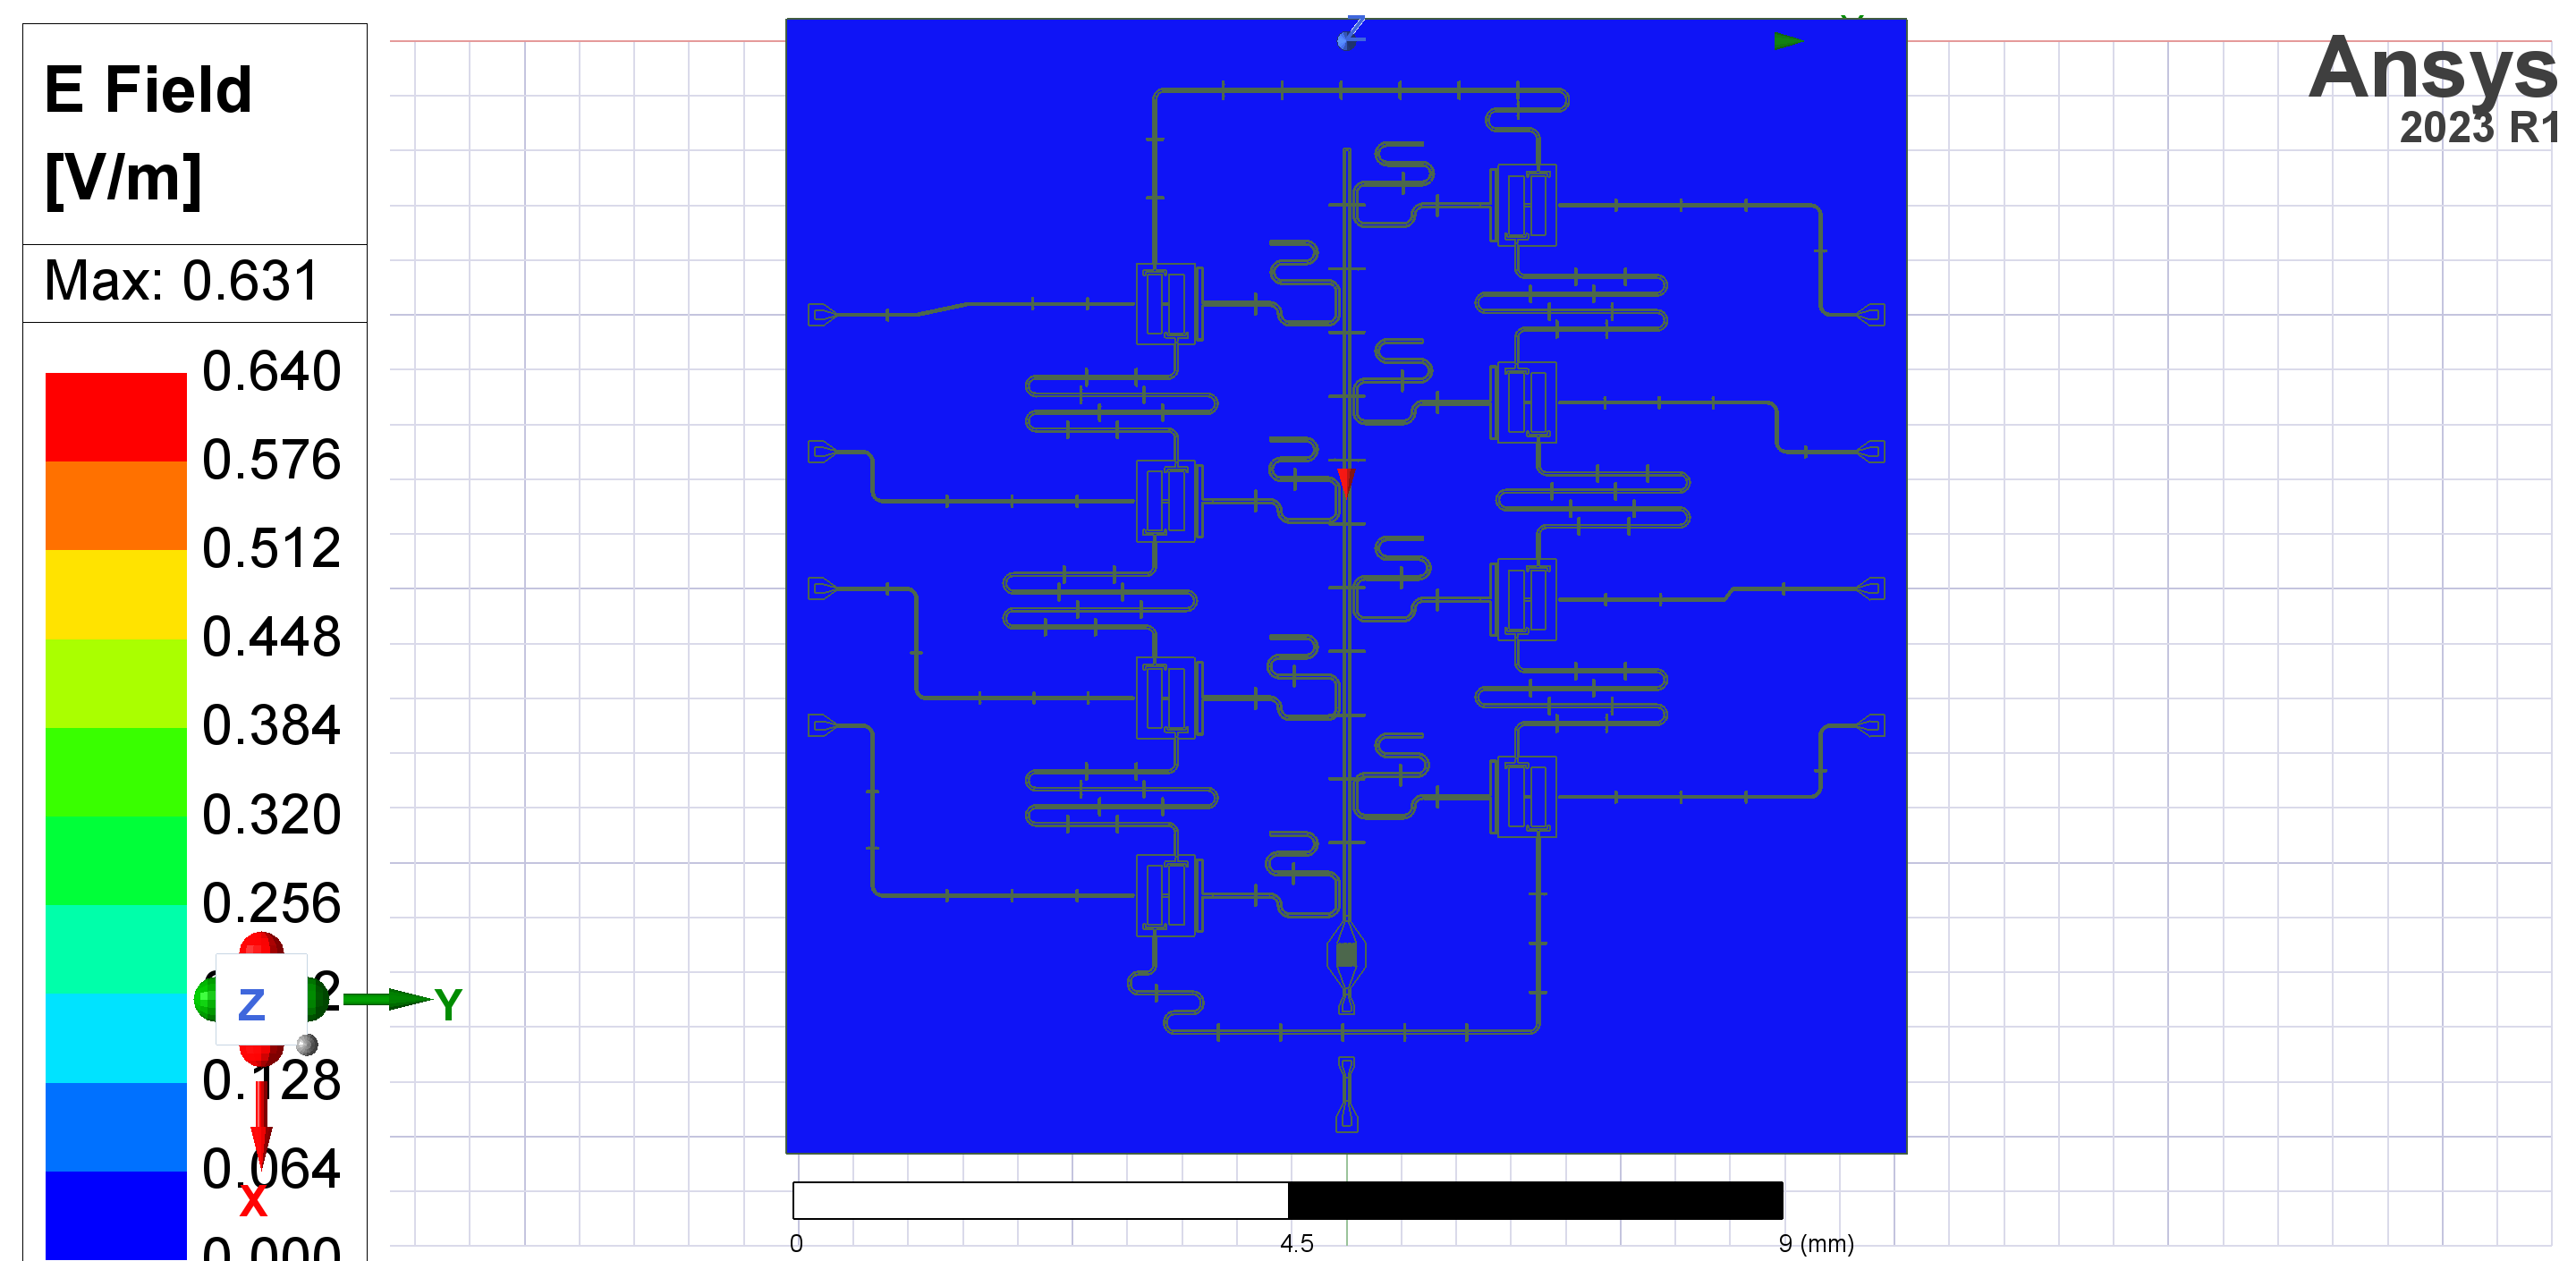

INFO 03:18PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


2


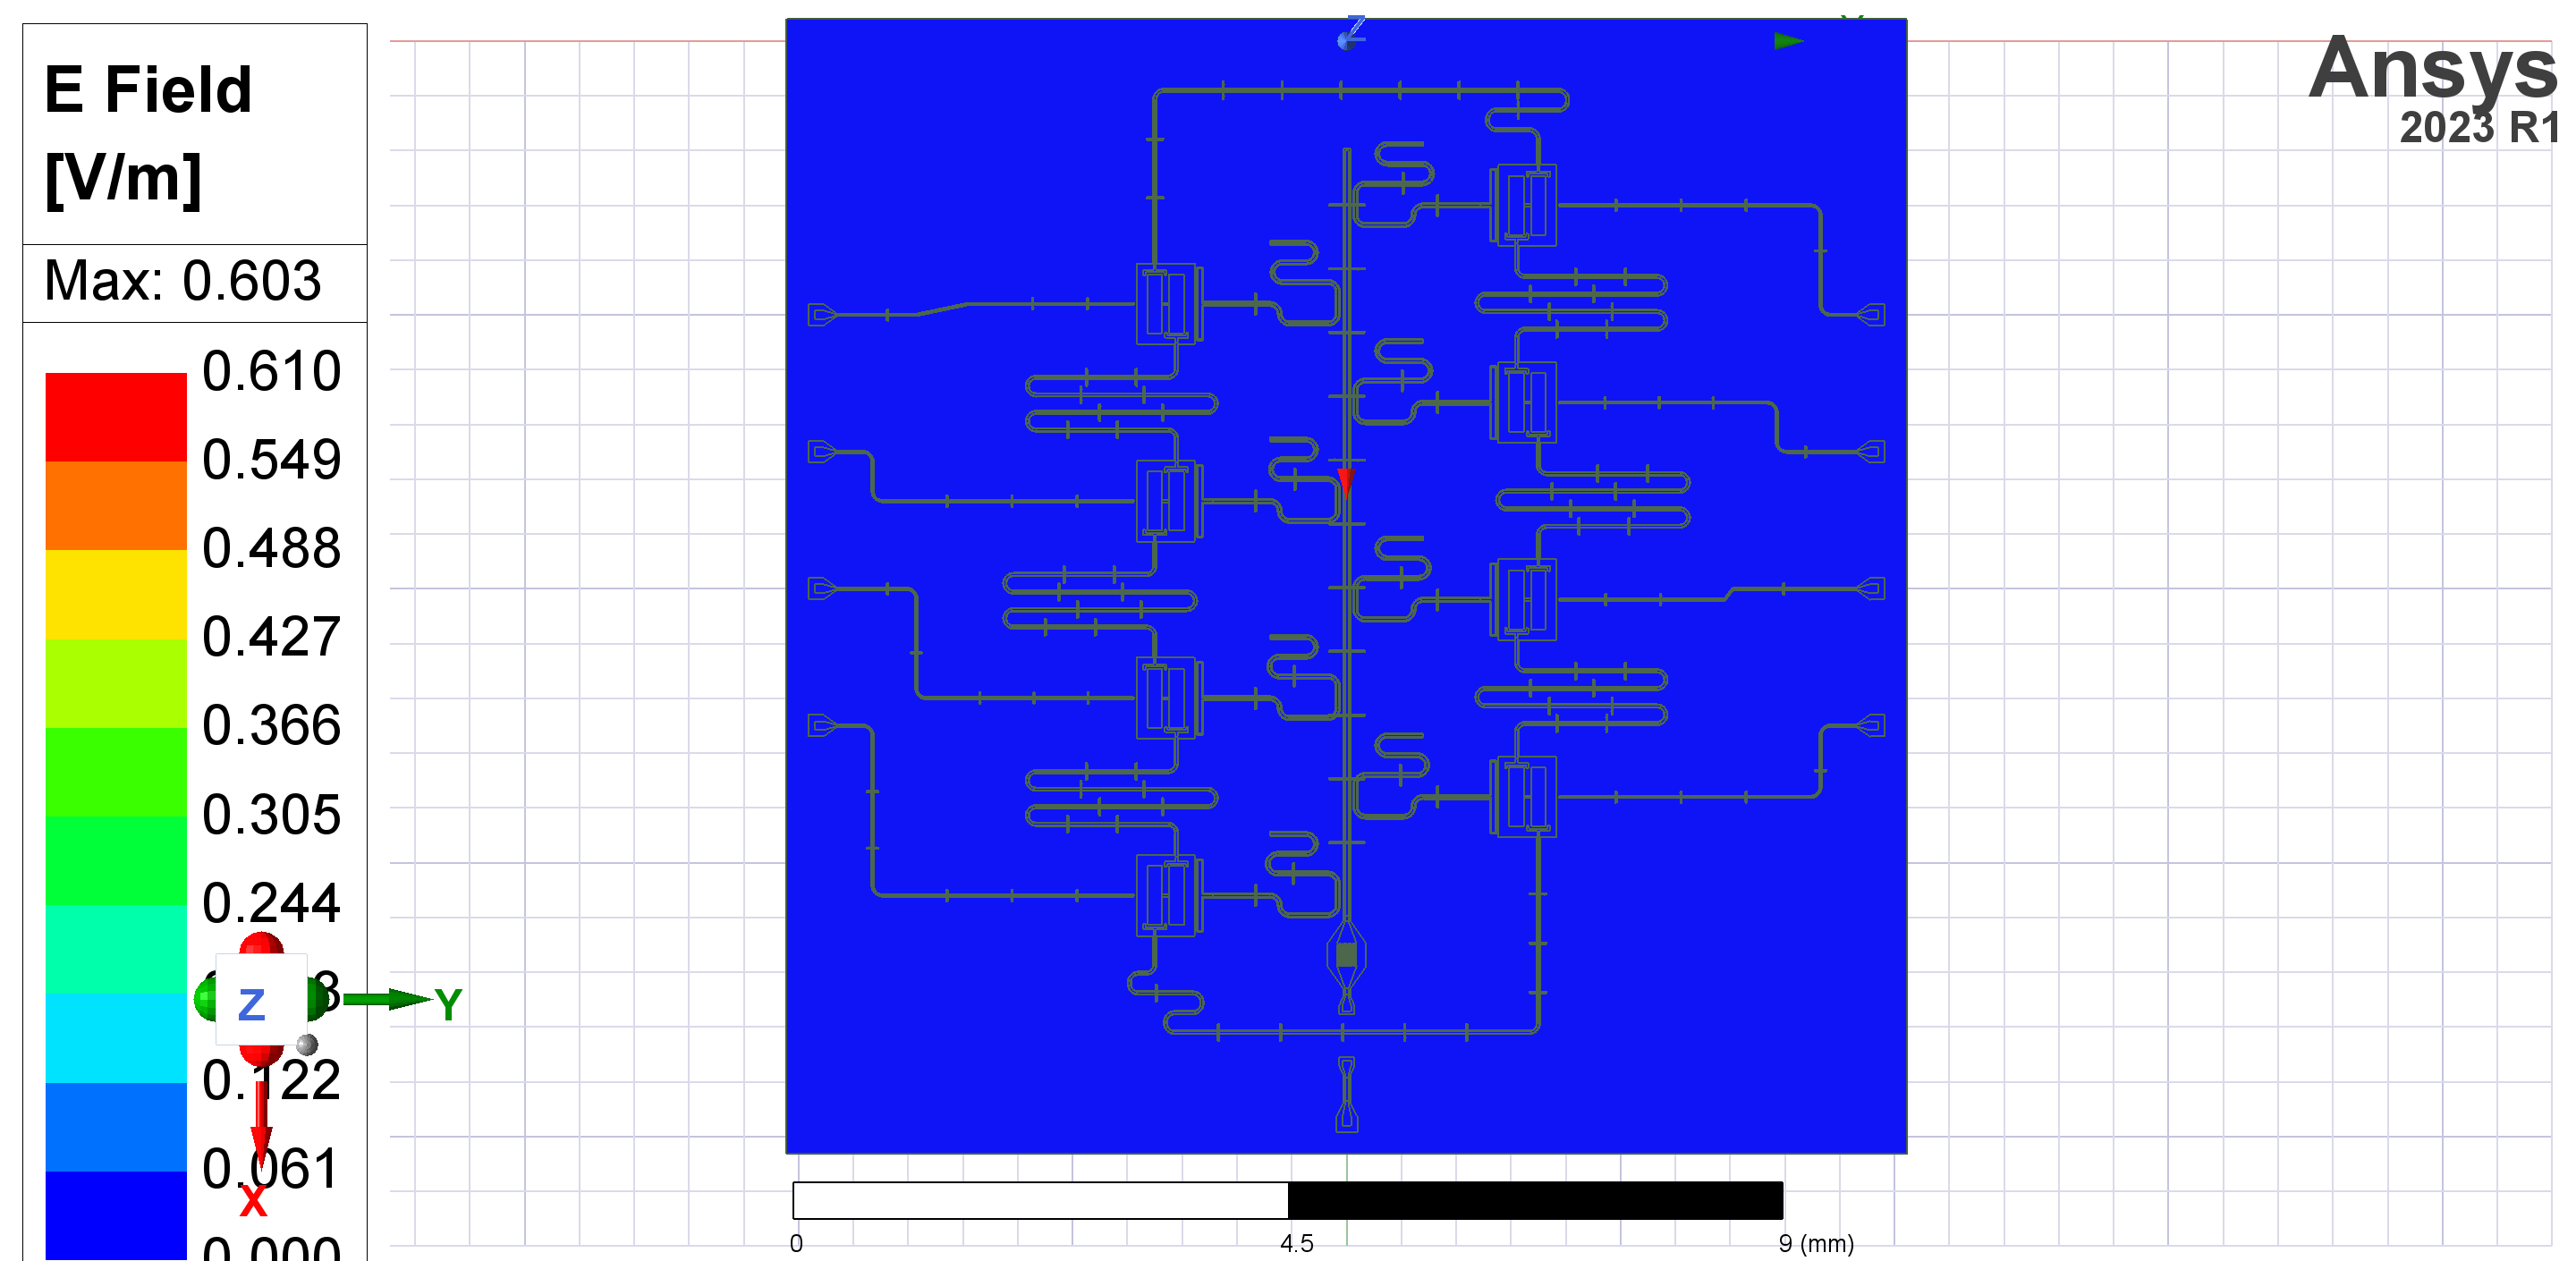

In [36]:
# eig_qb.sim.sim_setup_name = 'Setup' # When kernels dies, this line is needed to run before plotting fields
for i in range(1,eig_qb.sim.setup.n_modes+1):
    
    print(i)

    eig_qb.sim.plot_fields('main', i)
    eig_qb.sim.save_screenshot()
    # for loop을 반복하면 Ansys에 필드 플롯이 계속 쌓여서 다음 루프가 느려지는 것 같음
    # 필요 없는 플롯을 지우기 위해 clear_fields()를 사용. 다만 이렇게 하면 Colorbar 설정이 바뀜.
    eig_qb.sim.clear_fields()
    if i==2:
        break

In [35]:
eig_qb.sim.clear_fields()

In [28]:
eig_qb.sim.run_sim(name="Berkeley_8Qring_sample_3_S21", components=[], open_terminations=[])

INFO 04:13PM [connect_design]: 	Opened active design
	Design:    Berkeley_8Qring_sample_3_S21_hfss [Solution type: Eigenmode]
WARNING 04:13PM [connect_setup]: 	No design setup detected.
WARNING 04:13PM [connect_setup]: 	Creating eigenmode default setup.
INFO 04:13PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:14PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:14PM [analyze]: Analyzing setup Setup
04:14PM 50s INFO [get_f_convergence]: Saved convergences to c:\Users\user\Documents\GitHub\qiskit-metal\hfss_eig_f_convergence.csv


('Berkeley_8Qring_sample_3_S21_hfss', 'Setup')

In [88]:
# time.sleep(2)
eig_qb.sim.plot_convergences()

TypeError: 'Dict' object is not callable

In [29]:
eig_qb.setup
# rend = eig_qb.sim.renderer
# eig_qb.setup.setmode([1,2,6])

{'junctions': {'jj1': {'Lj_variable': 'Lj1',
   'Cj_variable': 'Cj1',
   'rect': 'JJ_rect_Lj_Q_1_rect_jj',
   'line': 'JJ_Lj_Q_1_rect_jj_'},
  'jj2': {'Lj_variable': 'Lj2',
   'Cj_variable': 'Cj2',
   'rect': 'JJ_rect_Lj_Q_2_rect_jj',
   'line': 'JJ_Lj_Q_2_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj1'}

In [30]:

eig_qb.run_epr()
# (pyEPR allows to switch modes: eprd.set_mode(1))

Design "Berkeley_8Qring_sample_3_hfss" info:
	# eigenmodes    3
	# variations    1
Design "Berkeley_8Qring_sample_3_hfss" info:
	# eigenmodes    3
	# variations    1

        energy_elec_all       = 9.28987080803236e-25
        energy_elec_substrate = 8.55736247564873e-25
        EPR of substrate = 92.1%

        energy_mag    = 9.27519864933177e-25
        energy_mag % of energy_elec_all  = 99.8%
        

Variation 0  [1/1]

  Mode 0 at 5.56 GHz   [1/3]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%   1.69e-25 1.638e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.52%
	jj1             0.000158749  (+)        4.03127e-06
		Energy fraction (Lj over Lj&Cj)= 97.41%
	jj2             0.989475  (+)        0.0262622
		(U_tot_cap-U_tot_ind)/mean=1.33%
Calculating Qdielectric_main for mode 0 (0

WARNING 11:32AM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Trailblazer_test\Berkeley_8Qring_sample_3_hfss\2024-07-16 11-30-45.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.027098
1    1.027170
2    1.027846
dtype: float64



  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions



Pm_norm idx =
     jj1    jj2
0  False   True
1   True  False
2  False  False
*** P (participation matrix, not normlz.)
        jj1       jj2
0  0.000155  0.964150
1  0.963622  0.000173
2  0.000839  0.000740

*** S (sign-bit matrix)
   s_jj1  s_jj2
0      1     -1
1     -1     -1
2     -1      1
*** P (participation matrix, normalized.)
   0.00015     0.99
      0.99  0.00017
   0.00084  0.00074

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       252    0.167    0.549
     0.167      252    0.609
     0.549    0.609 0.000666

*** Chi matrix ND (MHz) 
       279  -0.0299    0.458
   -0.0299      278      0.5
     0.458      0.5 0.000468

*** Frequencies O1 PT (MHz)
0    5308.571143
1    5432.890785
2    8103.271518
dtype: float64

*** Frequencies ND (MHz)
0    5295.830624
1    5420.484859
2    8103.300628
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,10.4
0,5295.83
1,5420.48
2,8103.30


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0       1         2
Lj1                             
10.4 0  279.10   -0.03  4.58e-01
     1   -0.03  278.27  5.00e-01
     2    0.46    0.50  4.68e-04

In [83]:
eig_qb.sim.close()

# 360

Warning! 3 COM references still alive
Ansys will likely refuse to shut down


In [ ]:
Phi_0 = 2.067833848e-15
Lj_test = 17
Ic_test = Phi_0/2/np.pi/Lj_test/1e-9
print("When Lj={:.3f}[nH],".format(Lj_test)+"Ic={:.3f}[nA]".format(Ic_test/1e-9))

When Lj=17.000[nH],Ic=19.359[nA]
